# ECON 140R - Regression

In [1]:
#imports
library(tidyverse)
library(haven)
library(dplyr)
library(repr)
library(stargazer)
library(pander)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




# Part 1: Introduction

<h2>Learning Objectives</h2>

* Perform EDA on a dataset
* Learn to spot correlations
* Run a $t$-test for difference in means
* Run an ordinary least squares (OLS) regression $y_i = \alpha + \beta \ D_i + \epsilon_i$ using `lm()`
* Understand Ommited Variable Bias Formula
* Add more controls to the regression

__Some references for deeper dive:__ 
1. [Linear Regression with One Regressor](https://www.econometrics-with-r.org/4-lrwor.html)
2. [Regression Models with Multiple Regressors](https://www.econometrics-with-r.org/6-rmwmr.html)

<h2>Data</h2>

We will analyze an extract of 534 observations from the 1985 Current Population Survey (CPS) to explore how hourly wages differ among men and women with similar observed characteristics.

__Source__: http://data.princeton.edu/wws509/datasets/wages.dta

__Columns__:

1. `education`: years of education
2. `south`: indicator for southern states 
3. `female`: indicator for females
4. `workexp`: years of work experience 
5. `unionmember`: indicator of union membership
6. `wages`: the hourly wage in dollars
7. `age`: age 
7. `ethnicity`: ethnicity (coded 1=other, 2=hispanic, 3=white)
8. `occupation`: occupation (coded 1=management, 2=sales, 3=clerical, 4=service, 5=professional, 6=other)
9. `sector`: sector (coded 0=other, 1=manufacturing, 2=construction)
10. `married`: indicator for married respondents.


In [2]:
#read the dataset
wages_df <- read_dta("http://data.princeton.edu/wws509/datasets/wages.dta")

# Part 2: EDA

Let us explore the data and answer the following questions:

* How many observations are there in the dataset?
* How many variables are there in the dataset?
* What proportion of the data is male?
* What is the average monthly wage in the data?
* What does the distribution of the variables look like?
* Is there a correlation between wage and being female?

## Inital exploration of the dataset

In [3]:
#display the top 5 rows
head(wages_df)

education,south,female,workexp,unionmember,wages,age,ethnicity,occupation,sector,married
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>
8,0,1,21,0,5.10,35,2,6,1,1
9,0,1,42,0,4.95,57,3,6,1,1
12,0,0,1,0,6.67,19,3,6,1,0
12,0,0,4,0,4.00,22,3,6,0,0
12,0,0,17,0,7.50,35,3,6,0,1
13,0,0,9,1,13.07,28,3,6,0,0


In [4]:
#display the dimensions of the dataset
dim(wages_df)

[1] 534  11

__Checking for NULL values__

In [5]:
#one way to check for nulls
wages_df[!complete.cases(wages_df),]

education,south,female,workexp,unionmember,wages,age,ethnicity,occupation,sector,married
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>


In [6]:
#another way to check for nulls
wages_df[!rowSums(is.na(wages_df))==0,]

education,south,female,workexp,unionmember,wages,age,ethnicity,occupation,sector,married
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>


__Proportion of males in the dataset__

In [7]:
## what is the proportion of males in dataset? 
(1 - mean(wages_df$female))*100

[1] 54.11985

## 5 number summary of the dataset

In [8]:
#print the 5 number summary for each column
pander(summary(wages_df))



|   education   |     south      |     female     |    workexp    |
|:-------------:|:--------------:|:--------------:|:-------------:|
| Min.   : 2.00 | Min.   :0.0000 | Min.   :0.0000 | Min.   : 0.00 |
| 1st Qu.:12.00 | 1st Qu.:0.0000 | 1st Qu.:0.0000 | 1st Qu.: 8.00 |
| Median :12.00 | Median :0.0000 | Median :0.0000 | Median :15.00 |
| Mean   :13.02 | Mean   :0.2921 | Mean   :0.4588 | Mean   :17.82 |
| 3rd Qu.:15.00 | 3rd Qu.:1.0000 | 3rd Qu.:1.0000 | 3rd Qu.:26.00 |
| Max.   :18.00 | Max.   :1.0000 | Max.   :1.0000 | Max.   :55.00 |

Table: Table continues below

 

|  unionmember   |     wages      |      age      |   ethnicity   |
|:--------------:|:--------------:|:-------------:|:-------------:|
| Min.   :0.0000 | Min.   : 1.000 | Min.   :18.00 | Min.   :1.000 |
| 1st Qu.:0.0000 | 1st Qu.: 5.250 | 1st Qu.:28.00 | 1st Qu.:3.000 |
| Median :0.0000 | Median : 7.780 | Median :35.00 | Median :3.000 |
| Mean   :0.1798 | Mean   : 9.024 | Mean   :36.83 | Mean   :2.699 |
| 3rd Qu.:0.

In [9]:
#print the 5 number summary for wages
summary(wages_df$wages)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.250   7.780   9.024  11.250  44.500 

## Histograms

Generate histograms for:

    1. wages
    2. natural logarithm of wages
    3. education
    4. age

What do you observe about each of these distributions?

In [10]:
#control formatting options for plot width and height
options(repr.plot.width=10, repr.plot.height=10)

__1. Wage__

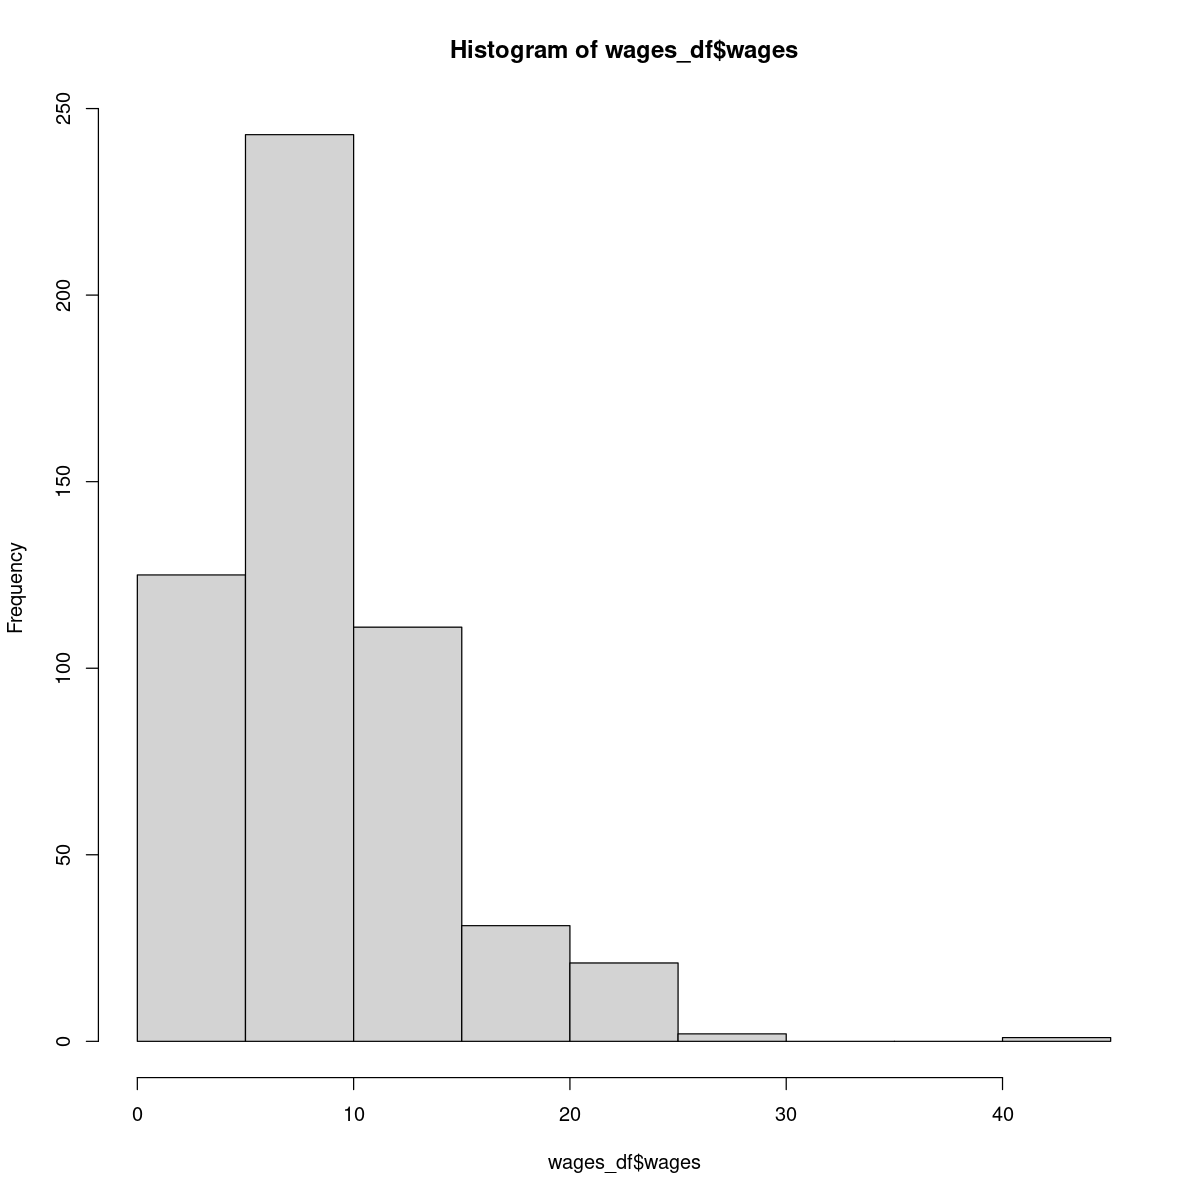

In [11]:
#histogram for wage
hist(wages_df$wages)

__2. Natural log of wages__

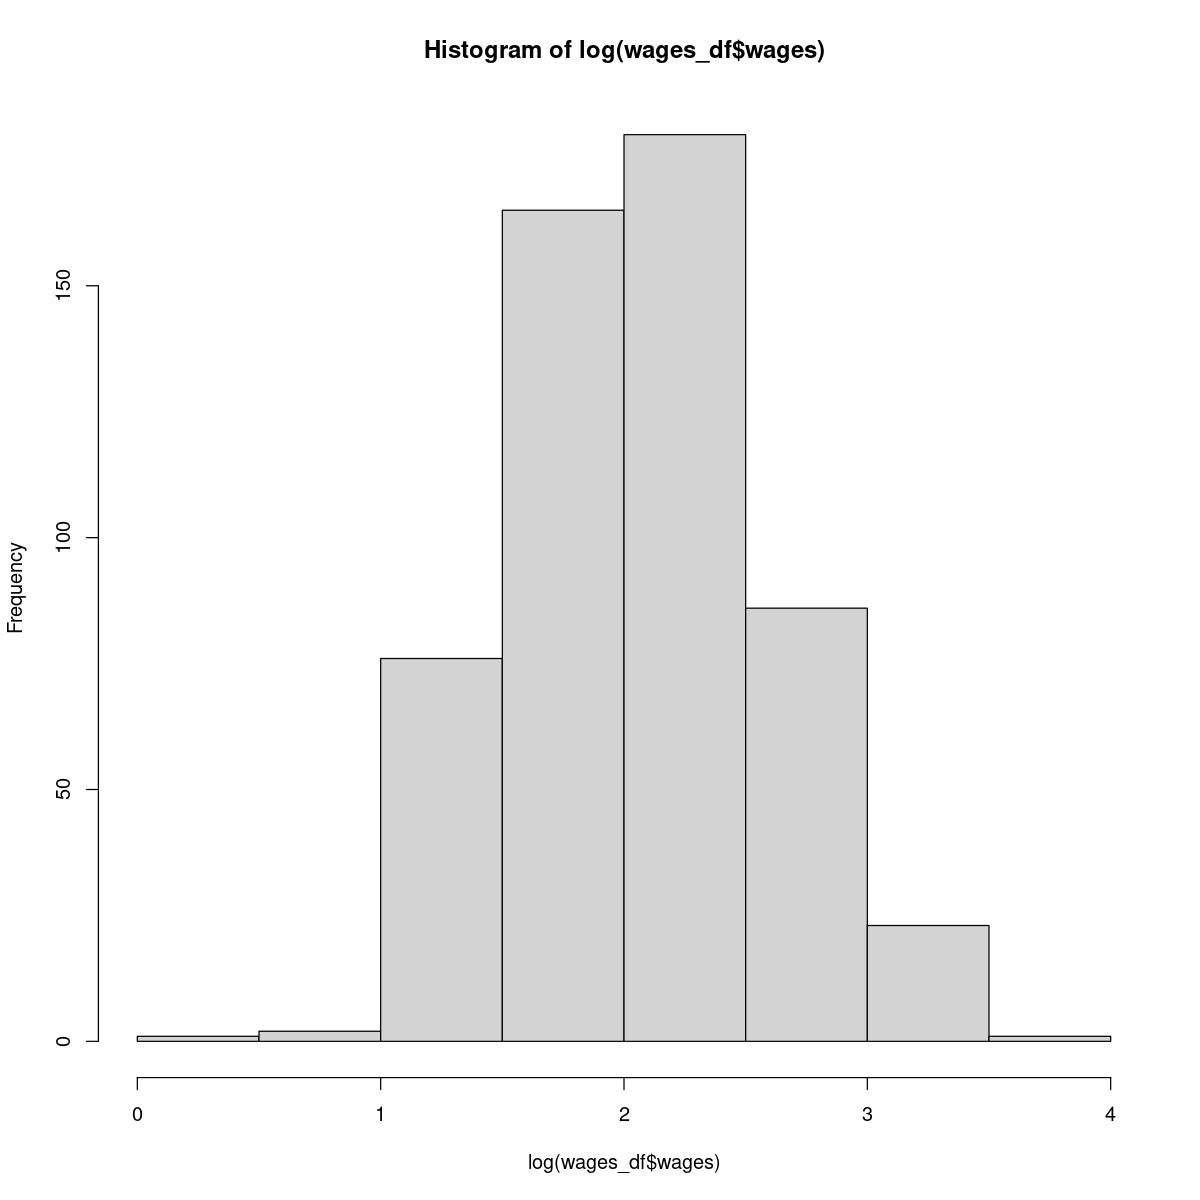

In [12]:
#take the log of wages
#more on this later
hist(log(wages_df$wages))

__3. Education__

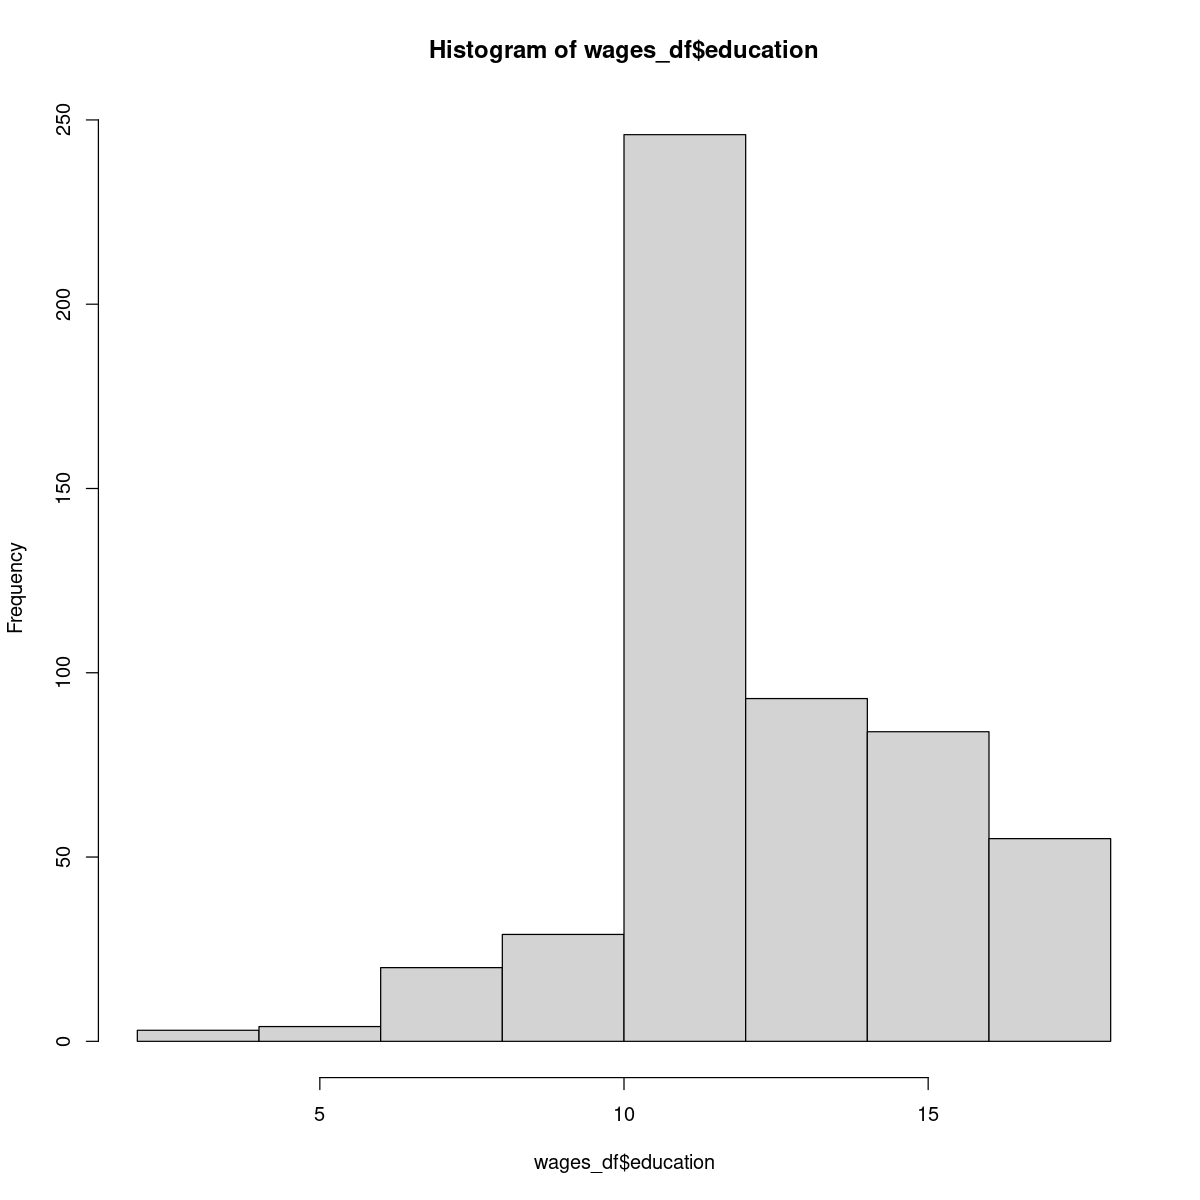

In [13]:
#histogram of education
hist(wages_df$education)

__4. Age__

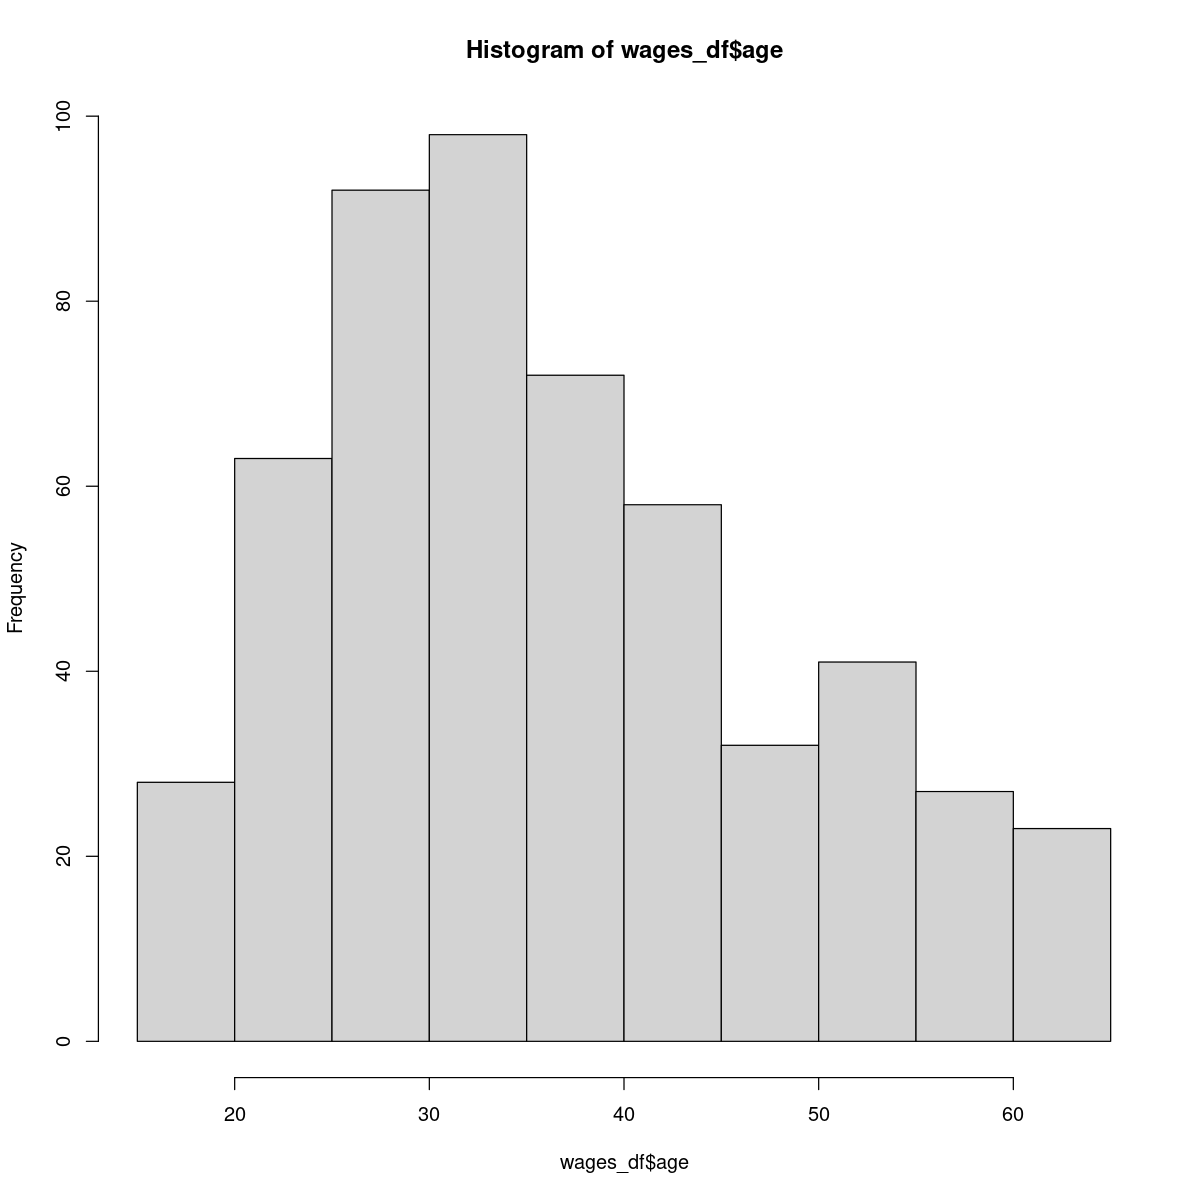

In [14]:
#histogram of age
hist(wages_df$age)

## Correlation

Let us look at the correlations between the variables in the dataset.

In [15]:
#plot formatting
options(repr.plot.width=15, repr.plot.height=15)

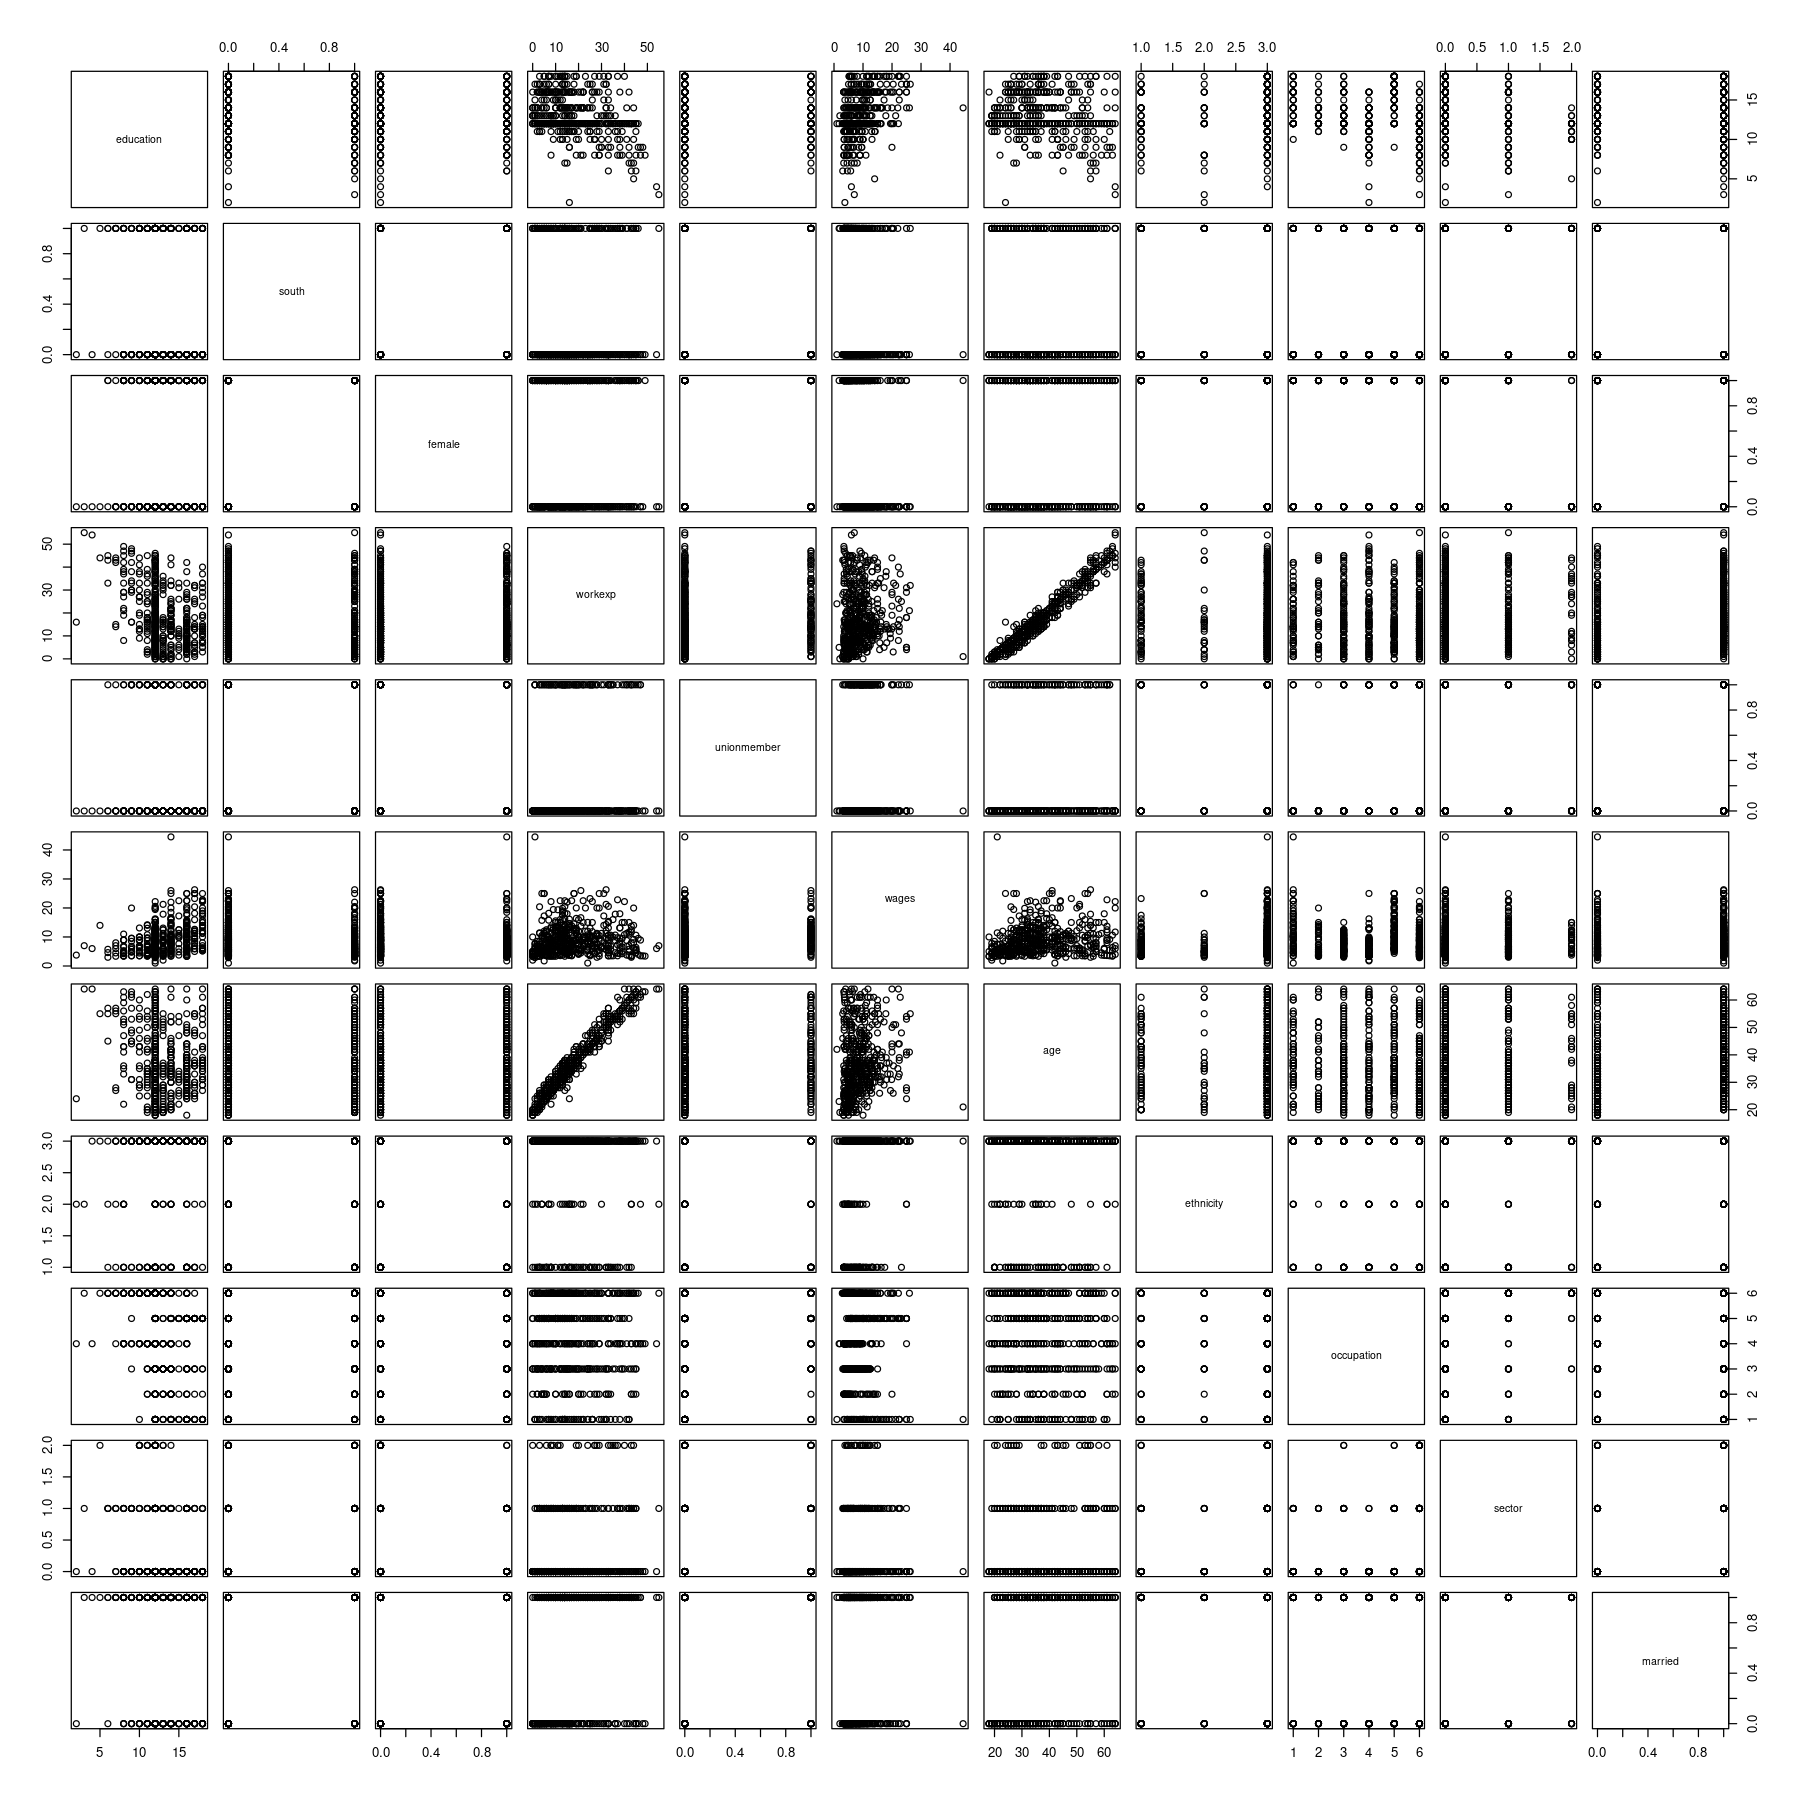

In [16]:
#visual inspection
plot(wages_df)

__Generating a correlation matrix__

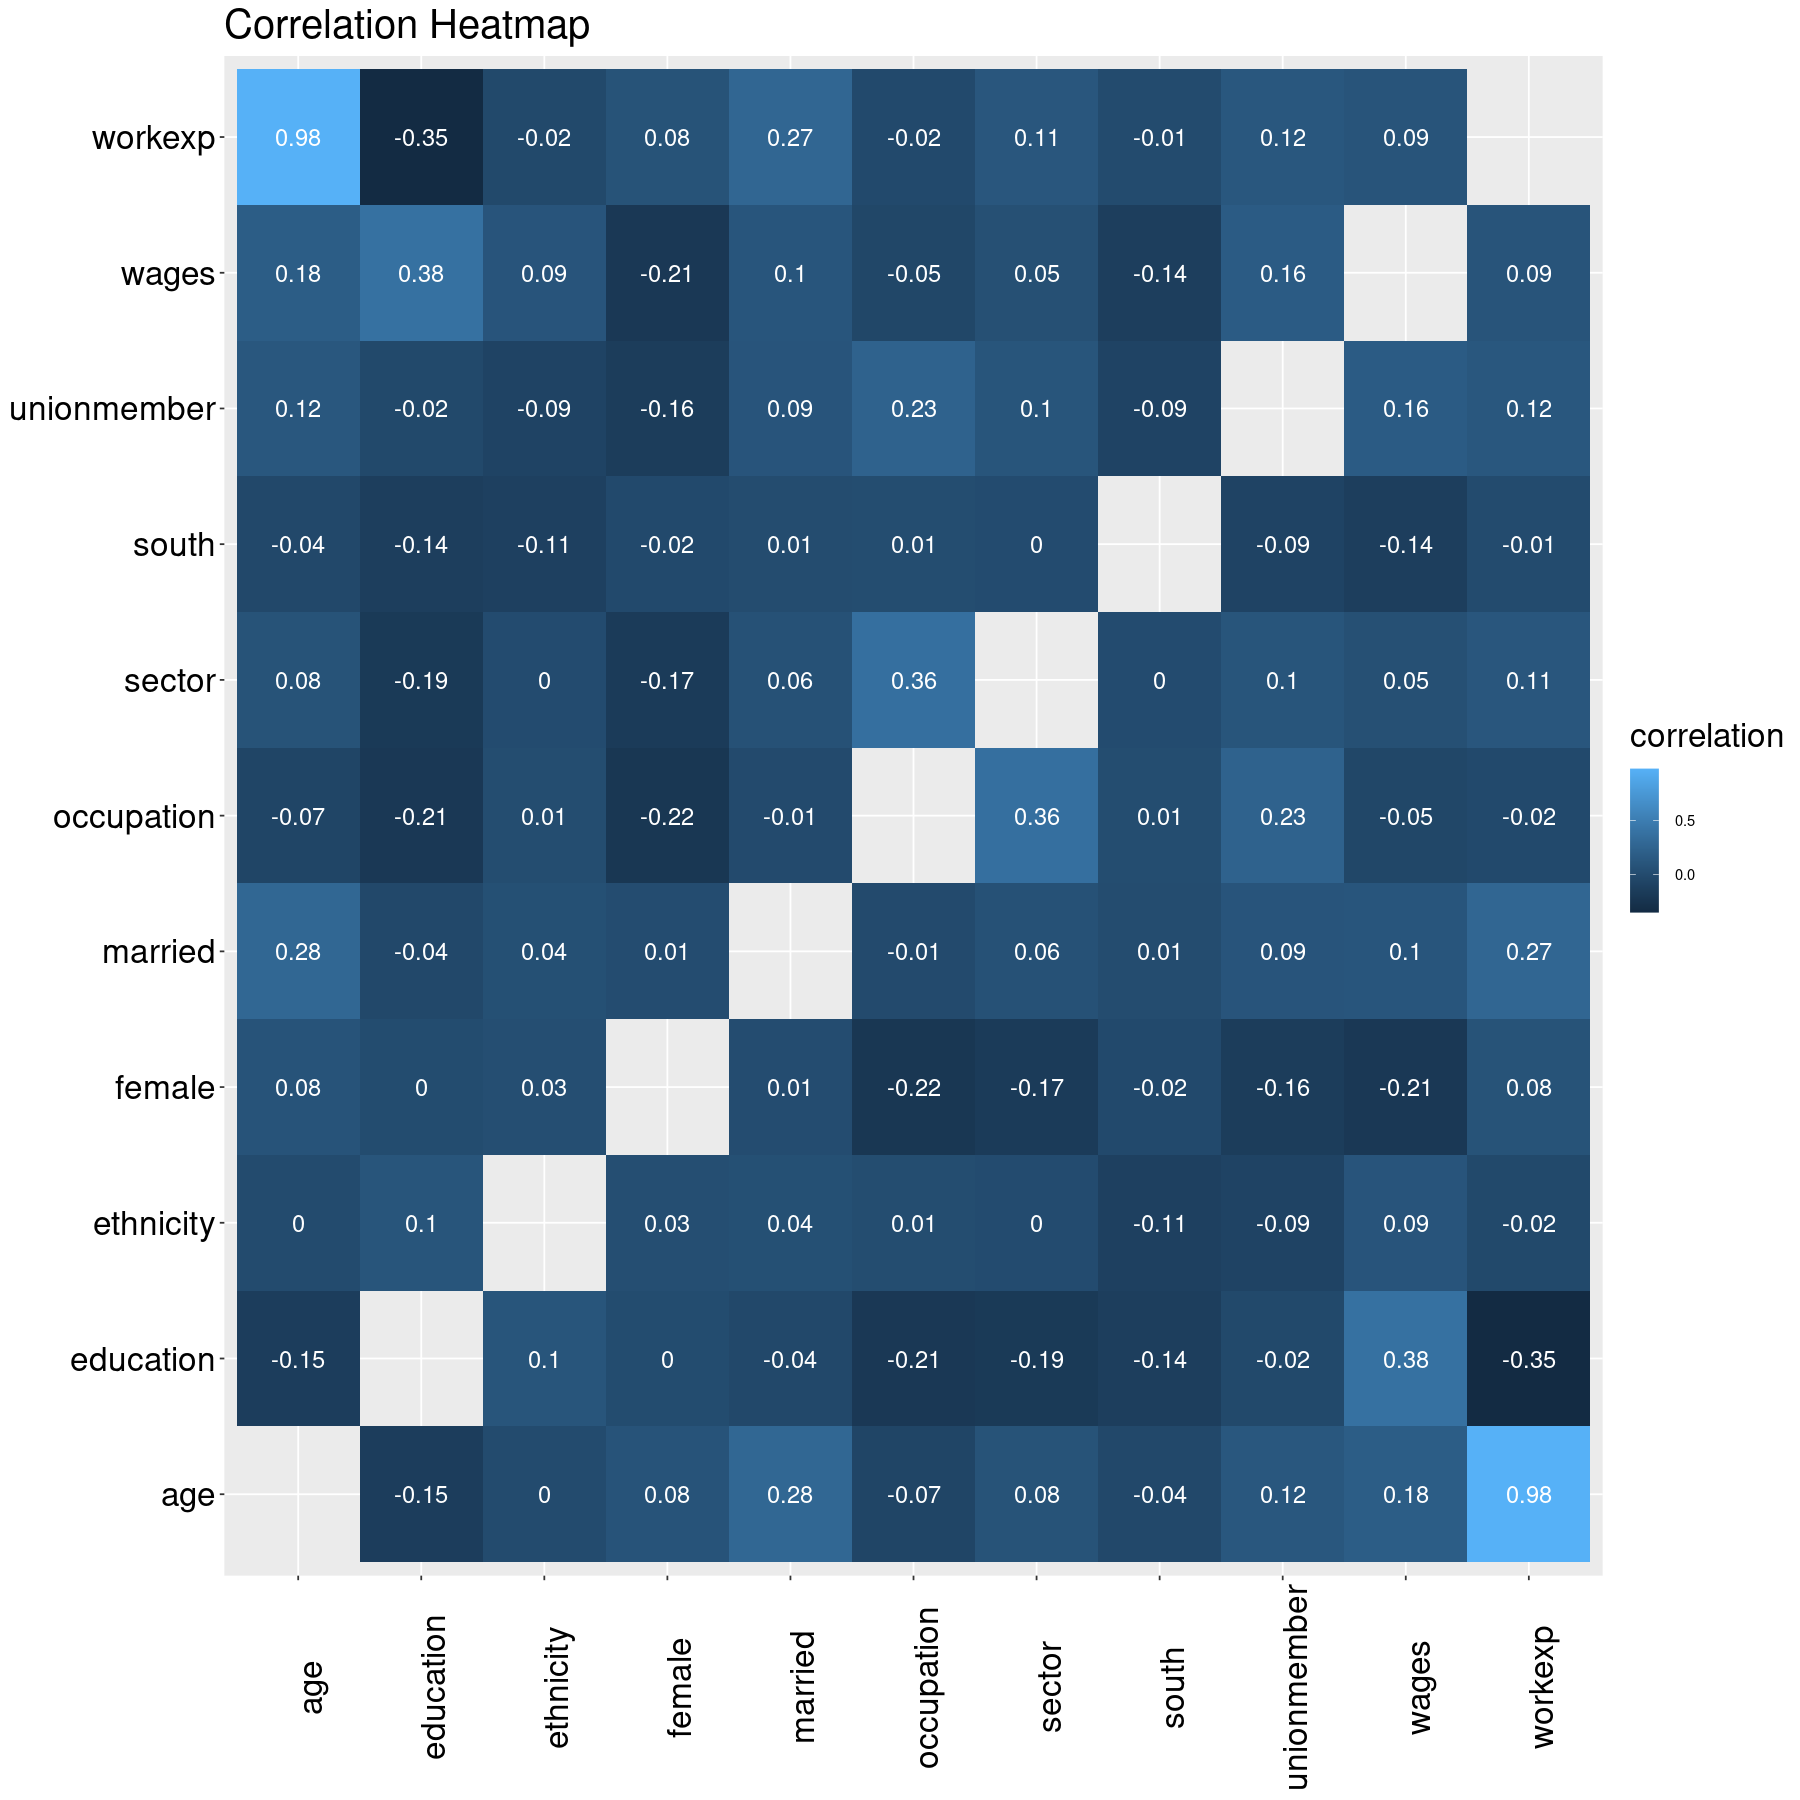

In [17]:
# Finding correlations
data_cor <- cor(wages_df)

data_cor %>%
  as.data.frame() %>%
  mutate(variables1 = rownames(data_cor)) %>%
  gather(key = 'variables2', value = 'correlation', -variables1) %>%
  filter(correlation != 1) %>%
  ggplot(aes(x = variables2, y = variables1, fill = correlation)) +
  geom_tile() +
  geom_text(aes(label = round(correlation,2)), size = 5, colour = "white") +
  ggtitle("Correlation Heatmap") +
  theme(title = element_text(size = 20),
        axis.title = element_blank(),
        axis.text.x = element_text(size = 20, colour = "black", angle = 90),
        axis.text.y = element_text(size = 20, colour = "black"))

### Question: 

Is there a correlation between wages and being female?

# Part 2: Two sample $t$-test

Let us compare the difference in the mean wages for males and females and run a $t$-test to evaluate if the difference is significant.

In [18]:
#create separate dfs for males and females
wages_f <- wages_df[wages_df$female == 1,]
wages_m <- wages_df[wages_df$female == 0,]

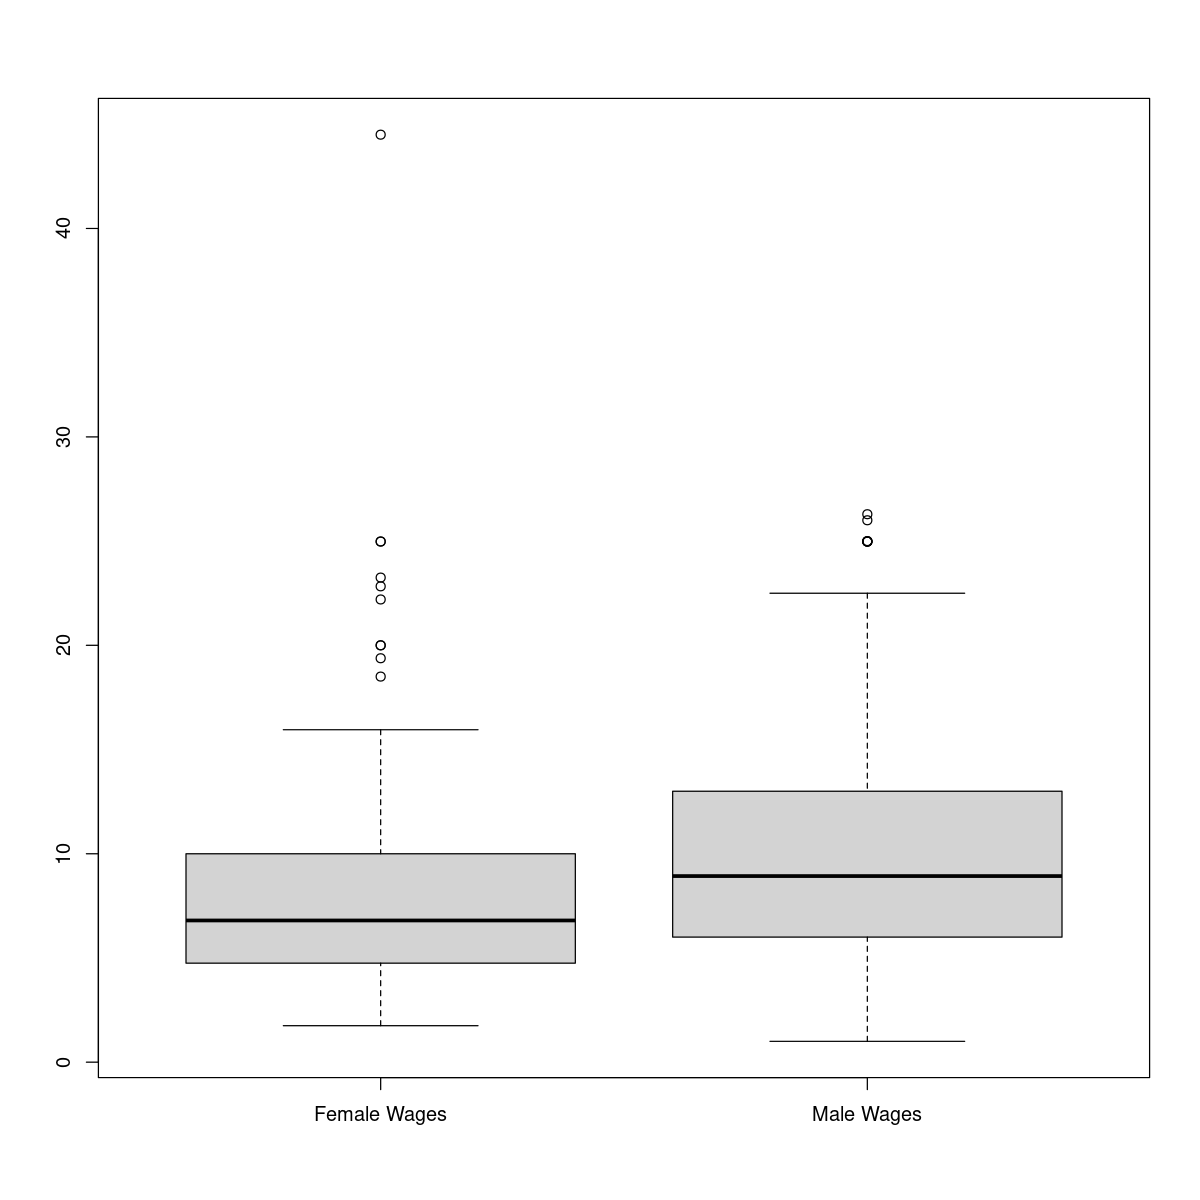

In [19]:
#plot formatting
options(repr.plot.width=10, repr.plot.height=10)

boxplot(wages_f$wages, wages_m$wages, names=c("Female Wages","Male Wages"))

In [20]:
#mean of each group
print(mean(wages_f$wages))
print(mean(wages_m$wages))
#difference in group means
print(mean(wages_f$wages) - mean(wages_m$wages))

[1] 7.878857
[1] 9.994913
[1] -2.116056


In [21]:
#print results of t-test
wages_ttest <- t.test(wages_f$wages, wages_m$wages)
pander(wages_ttest)



| Test statistic |  df   |     P value      | Alternative hypothesis |
|:--------------:|:-----:|:----------------:|:----------------------:|
|     -4.885     | 530.6 | 1.369e-06  * * * |       two.sided        |

Table: Welch Two Sample t-test: `wages_f$wages` and `wages_m$wages` (continued below)

 

| mean of x | mean of y |
|:---------:|:---------:|
|   7.879   |   9.995   |



__Is the difference significant?__

The $t$-statistic is -4.8 -- which implies that that difference in group means is roughly 5 times the standard error.

# Part 3: Fit a univariate linear model

Now let's run an OLS regression between wages and female.

$$
outcome_i = \alpha + \beta \ treatment_i + \epsilon_i\\
wages_i = \alpha + \beta \ female_i + \epsilon_i
$$

In [22]:
short_regression <- lm(wages ~ female, data=wages_df)
summary(short_regression)


Call:
lm(formula = wages ~ female, data = wages_df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.995 -3.529 -1.072  2.394 36.621 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.9949     0.2961   33.75  < 2e-16 ***
female       -2.1161     0.4372   -4.84  1.7e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.034 on 532 degrees of freedom
Multiple R-squared:  0.04218,	Adjusted R-squared:  0.04038 
F-statistic: 23.43 on 1 and 532 DF,  p-value: 1.703e-06


In [23]:
print(short_regression$coefficients[1] + 1*short_regression$coefficients[2])

(Intercept) 
   7.878857 


## Interpretation of coefficients:

Let us interpret this regression output. 

1. **What is the meaning of the intercept?**

    The intercept is always the 'conditional mean': The expected value of the outcome variable, conditional on all other variables being zero. Here, it is simply the average wage for males (female=0).
    

2. **What is the meaning of the coefficient on `female`?**

    This shows the difference in average wages between males and females. Female workers earn on average \\$2.11 per hour less than males.
    

3. **What do the other parts of the Coefficients output mean?**

    * __standard error:__ measures the average amount that the coefficient estimates vary from the actual average value of our response variable. The smaller the standard error, the more precise the estimate.
    
    * __$t$-statistic:__ (coefficient divided by standard error) is a measure of how many standard deviations our coefficient estimate is far away from 0. A $t$-statistic above 2 is equivalent to a $p$-value below 0.05. 
    
    * __$p$-value__: is the probability of observing any value equal or larger than $t$. A small p-value indicates that it is unlikely we will observe a relationship between the predictor (female) and response (wages) variables due to chance. In this case, we can reject the null hypothesis which states that the coefficient $\beta$ is equal to zero. In other words, there is a statistically significant relationship between the predictor variable and the response variable.
    

4. **Can you interpret the coefficient as the "gender wage gap"?**
    
    * Maybe. This is an "unconditional wage gap" - but we cannot interpret this as a causal or discrimination effect.
    
__Reference:__ [Quick Guide: Interpreting Simple Linear Model Output in R](https://feliperego.github.io/blog/2015/10/23/Interpreting-Model-Output-In-R)

# Part 4: Multiple Regression and Omitted Variable Bias

Since we also have `unionmember` in our dataset, let us use it. Do you think union membership might be an "omitted variable"?

**How does our estimate of the "gender wage gap" change if we include `unionmember` as an additional variable in the regression?** 

Let us define the new equation as:

$$
wages_i = \alpha + \beta \ female_i + \gamma \ unionmember_i + \epsilon_i
$$

Where $\gamma \ unionmember_i$ is defined as the control term.

**Note that the control term and the control group are different**

In [24]:
full_regression = lm(wages ~ female + unionmember, data=wages_df)
summary(full_regression)


Call:
lm(formula = wages ~ female + unionmember, data = wages_df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.577 -3.426 -1.353  2.324 36.824 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.5772     0.3229  29.661  < 2e-16 ***
female       -1.9012     0.4391  -4.330 1.79e-05 ***
unionmember   1.7755     0.5698   3.116  0.00193 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.994 on 531 degrees of freedom
Multiple R-squared:  0.05938,	Adjusted R-squared:  0.05583 
F-statistic: 16.76 on 2 and 531 DF,  p-value: 8.749e-08


In [25]:
abs(short_regression$coefficients[2] - full_regression$coefficients[2])

female 
0.2148496

In [26]:
print(full_regression$coefficients[1] + 1*full_regression$coefficients[2] + 1*full_regression$coefficients[3])

(Intercept) 
   9.451437 


## Interpretation of coefficients:

Let us interpret the full regression output. 

1. **What is the meaning of the intercept?**

    The intercept is always the 'conditional mean': The expected value of the outcome variable, conditional on all other variables being zero. Here, it is simply the average wage for males (female=0) when they are not union members.
    

2. **What is the meaning of the coefficient on `female`?**

    Female workers earn on average \\$1.90 per hour less than males when they are both union members.
    

3. **What is the meaning of the coefficient on `unionmember`?**

    The hourly wage is \\$1.77 higher for union workers with the same observed values of the other variables. 


## The OVB formula

Call the simple observational model the <b>short regression</b>

$$
wages_i = \alpha^s + \beta^s \ female_i + \epsilon^s_i
$$

while the model with union membership $\gamma$ (when $unionmember_i = 1$) will be the <b>long regression</b> because it includes one more right-hand side variable

$$
wages_i = \alpha^l + \beta^l \ female_i + \gamma \ unionmember_i + \epsilon^l_i
$$

We can formally define omitted variable bias as the difference between these two estimates of the "effect" of $female_i$ on $wages_i$: 

$$
OVB = \beta^s - \beta^l
$$

To decompose $OVB = \beta^s - \beta^l$ into parts that are conceptually easier to think about, we need a third regression, often called an <b>auxiliary regression</b>, which models the relationship between the omitted variable, $unionmemebr_i$, and the treatment variable, $female_i$. The auxiliary regression here is:

$$
unionmember_i = \pi_0 + \pi_1 \ female_i + u_i
$$

If this is the case, then the omitted variable bias in the short regression must be given by:

$$
OVB = \beta^s - \beta^l = \pi_1 \times \gamma
$$

The above relation is __ALWAYS__ true.

We saw above that our estimate of the gender wage gap has become smaller once we control for union membership. 


To formally investigate how the estimate for one coefficient changes if we include more variables in the regression, let us run these 3 regressions and check if the relation between coefficients holds:

* 1: __Full regression:__ Include female and unionmember
* 2: __Short (biased) regression:__ Incldue female only
* 3: __Auxiliary regression:__ Regress unionmember on female

In [27]:
full_regression = lm(wages ~ female + unionmember, data=wages_df)
summary(full_regression)


Call:
lm(formula = wages ~ female + unionmember, data = wages_df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.577 -3.426 -1.353  2.324 36.824 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.5772     0.3229  29.661  < 2e-16 ***
female       -1.9012     0.4391  -4.330 1.79e-05 ***
unionmember   1.7755     0.5698   3.116  0.00193 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.994 on 531 degrees of freedom
Multiple R-squared:  0.05938,	Adjusted R-squared:  0.05583 
F-statistic: 16.76 on 2 and 531 DF,  p-value: 8.749e-08


In [28]:
true_coefficient = full_regression$coefficients[2]
omitted_coefficient = full_regression$coefficients[3]

true_coefficient
omitted_coefficient

female 
-1.901207

unionmember 
   1.775493

In [29]:
short_regression = lm(wages ~ female, data=wages_df)
summary(short_regression)


Call:
lm(formula = wages ~ female, data = wages_df)

Residuals:
   Min     1Q Median     3Q    Max 
-8.995 -3.529 -1.072  2.394 36.621 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.9949     0.2961   33.75  < 2e-16 ***
female       -2.1161     0.4372   -4.84  1.7e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.034 on 532 degrees of freedom
Multiple R-squared:  0.04218,	Adjusted R-squared:  0.04038 
F-statistic: 23.43 on 1 and 532 DF,  p-value: 1.703e-06


In [30]:
biased_coefficient = short_regression$coefficients[2]
biased_coefficient

female 
-2.116056

In [31]:
auxiliary_regression =lm(unionmember ~ female, data=wages_df)
summary(auxiliary_regression)


Call:
lm(formula = unionmember ~ female, data = wages_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2353 -0.2353 -0.1143 -0.1143  0.8857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.23529    0.02235  10.528  < 2e-16 ***
female      -0.12101    0.03300  -3.667  0.00027 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3799 on 532 degrees of freedom
Multiple R-squared:  0.02466,	Adjusted R-squared:  0.02282 
F-statistic: 13.45 on 1 and 532 DF,  p-value: 0.0002697


In [32]:
auxiliary_coefficient = auxiliary_regression$coefficients[2]
auxiliary_coefficient

female 
-0.1210084

In [33]:
print(biased_coefficient - true_coefficient)
print(auxiliary_coefficient*omitted_coefficient)

    female 
-0.2148496 
    female 
-0.2148496 


# Part 5: Control for more variables

Your turn!

1. Fit a linear model to explore how hourly wages depend on education, work experience, union membership, region, and sex.

2. Describe the net effects of education, work experience, union membership, and region on wages.

3. Describe the gender gap after adjusting for the effects of the other variables in the model, and test its significance.

# Part 6: What if we wanted to control for occupation

1. What type of variable is occupation?

2. What would happen if we use it directly in `lm()`?

In [34]:
#recode variables
wages_df$occup_management <- ifelse(wages_df$occupation == 1, 1, 0)

# Bonus: Using `stargazer` to present regression outputs as a table

Reference: [stargazer](https://cran.r-project.org/web/packages/stargazer/vignettes/stargazer.pdf)

In [35]:
stargazer(short_regression, full_regression, type = "text", title = "Gender Wage Gap")


Gender Wage Gap
                                  Dependent variable:              
                    -----------------------------------------------
                                         wages                     
                              (1)                     (2)          
-------------------------------------------------------------------
female                     -2.116***               -1.901***       
                            (0.437)                 (0.439)        
                                                                   
unionmember                                        1.775***        
                                                    (0.570)        
                                                                   
Constant                   9.995***                9.577***        
                            (0.296)                 (0.323)        
                                                                   
-------------------------------